#### Inspiration
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?

http://insideairbnb.com/get-the-data.html

http://insideairbnb.com/rio-de-janeiro/

In [5]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756096 sha256=e7499fa204756226ac8842e81de7aeb3d80f451eab81e7ac135ed8ead4e54798
  Stored in directory: /tmp/pip-ephem-wheel-cache-ek63chh3/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [6]:
import sys
pasta_projeto = '/content/drive/My Drive/ColabNotebooks/Projetos Portifolio/Airbnb Open Data'
sys.path.append(pasta_projeto)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from utils import Utils

%matplotlib inline

In [8]:
pasta = pasta_projeto+'/data'
listings = pd.read_csv(pasta+'/listings.csv', index_col=0)

In [9]:
listings.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,188,7,251,2020-04-06,2.09,1,335
21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,442,5,94,2020-03-22,1.23,1,90
25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.96,3,129
31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,359,2,282,2020-03-02,2.35,1,0
35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,495,2,181,2020-03-15,2.25,1,357


In [10]:
print(listings.shape)
print(listings.dtypes)

(35793, 15)
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [11]:
if listings['neighbourhood_group'].isnull().sum() == listings.shape[0]:
  listings.drop('neighbourhood_group', axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


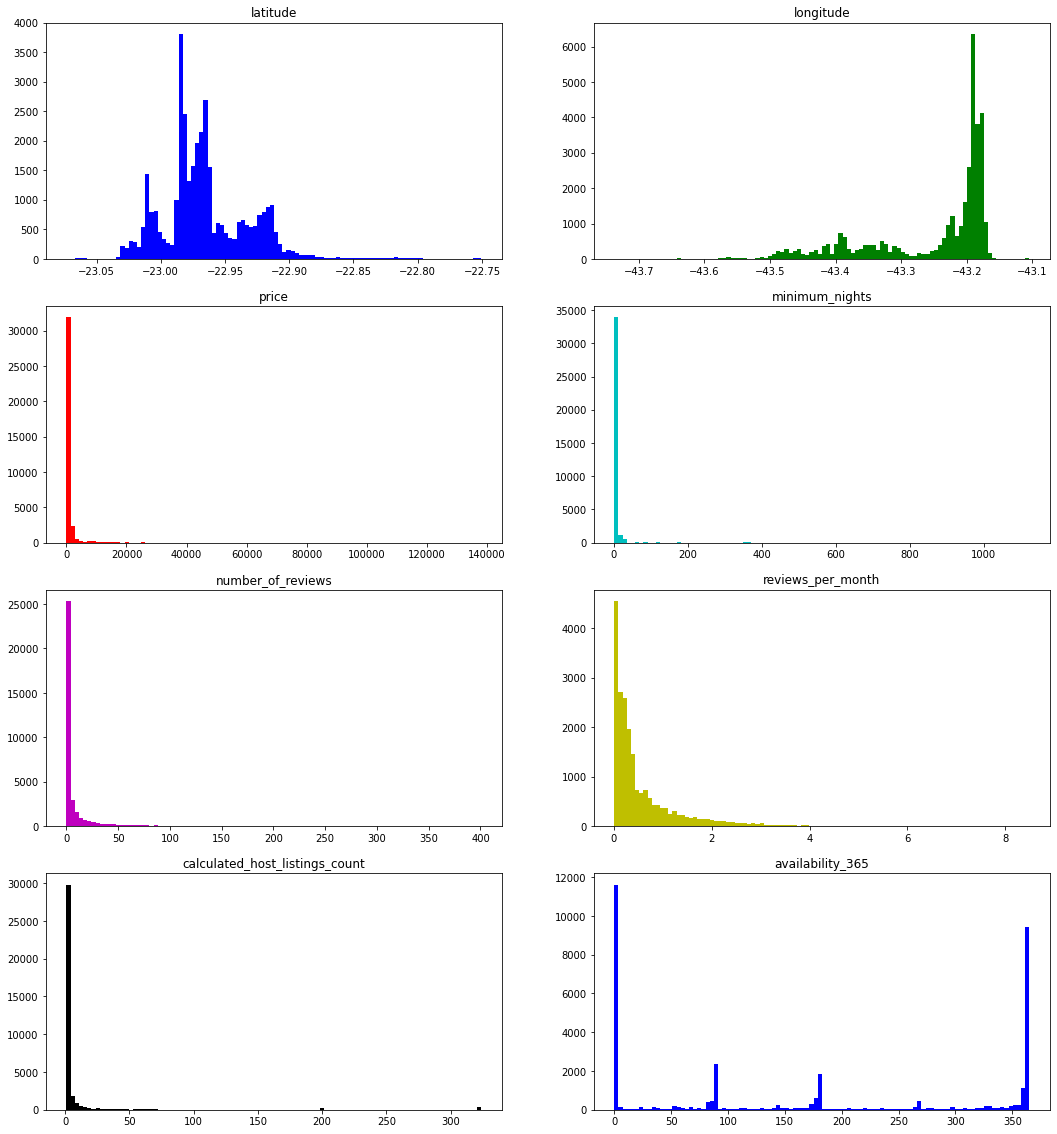

In [12]:
count_number = len(listings._get_numeric_data().columns[1:])
plt.figure(figsize = (18, 20))
cont = 1
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']

for i in listings._get_numeric_data().columns[1:]:
      plt.subplot(4, 2, cont)
      plt.hist(listings[i], bins = 100, color=colors[cont-1])
      plt.title(str(i))
      cont+=1

plt.show()

In [13]:
listings[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'calculated_host_listings_count']].describe().iloc[1:]

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count
mean,795.617858,4.797586,9.747576,0.581955,171.900455,8.189059
std,2452.937585,21.844137,25.828574,0.763331,154.647434,34.830690
min,0.000000,1.000000,0.000000,0.010000,0.000000,1.000000
25%,159.000000,1.000000,0.000000,0.120000,0.000000,1.000000
50%,299.000000,2.000000,1.000000,0.300000,160.000000,1.000000
75%,649.000000,4.000000,6.000000,0.720000,362.000000,3.000000
max,138288.000000,1123.000000,401.000000,8.490000,365.000000,324.000000


33363


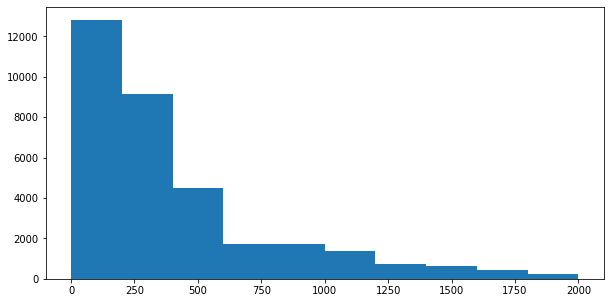

In [14]:
Utils.plot_hist_shape(listings, 'price', 2000)

In [15]:
listings.drop(listings[listings['price'] > 2000].index, inplace=True)
listings.shape

(33363, 14)

33153


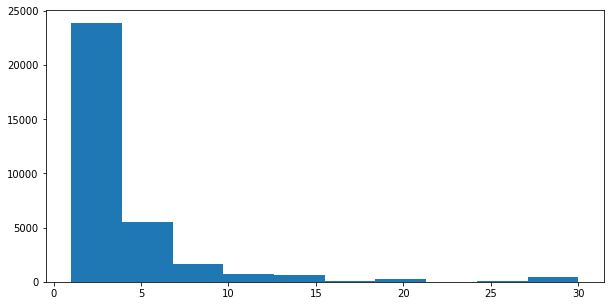

In [16]:
Utils.plot_hist_shape(listings, 'minimum_nights', 30)

In [17]:
listings.drop(listings[listings['minimum_nights'] > 30].index, inplace=True)
listings.shape

(33153, 14)

32501


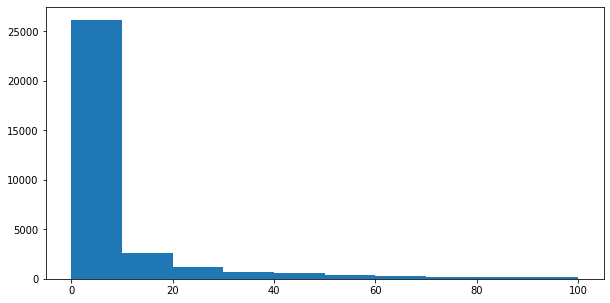

In [18]:
Utils.plot_hist_shape(listings,'number_of_reviews', 100)

In [19]:
listings.drop(listings[listings['number_of_reviews'] > 100].index, inplace=True)
listings.shape

(32501, 14)

31377


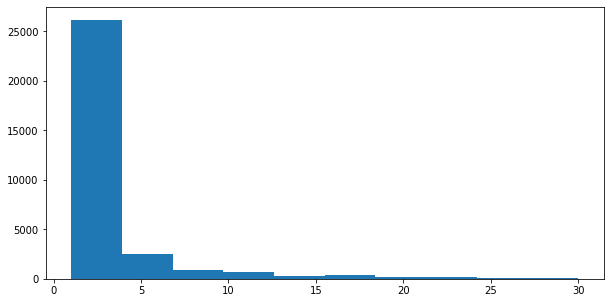

In [20]:
Utils.plot_hist_shape(listings, 'calculated_host_listings_count', 30)

In [21]:
listings.drop(listings[listings['calculated_host_listings_count'] > 30].index, inplace=True)
listings.shape

(31377, 14)

In [22]:
listings.drop('host_id', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


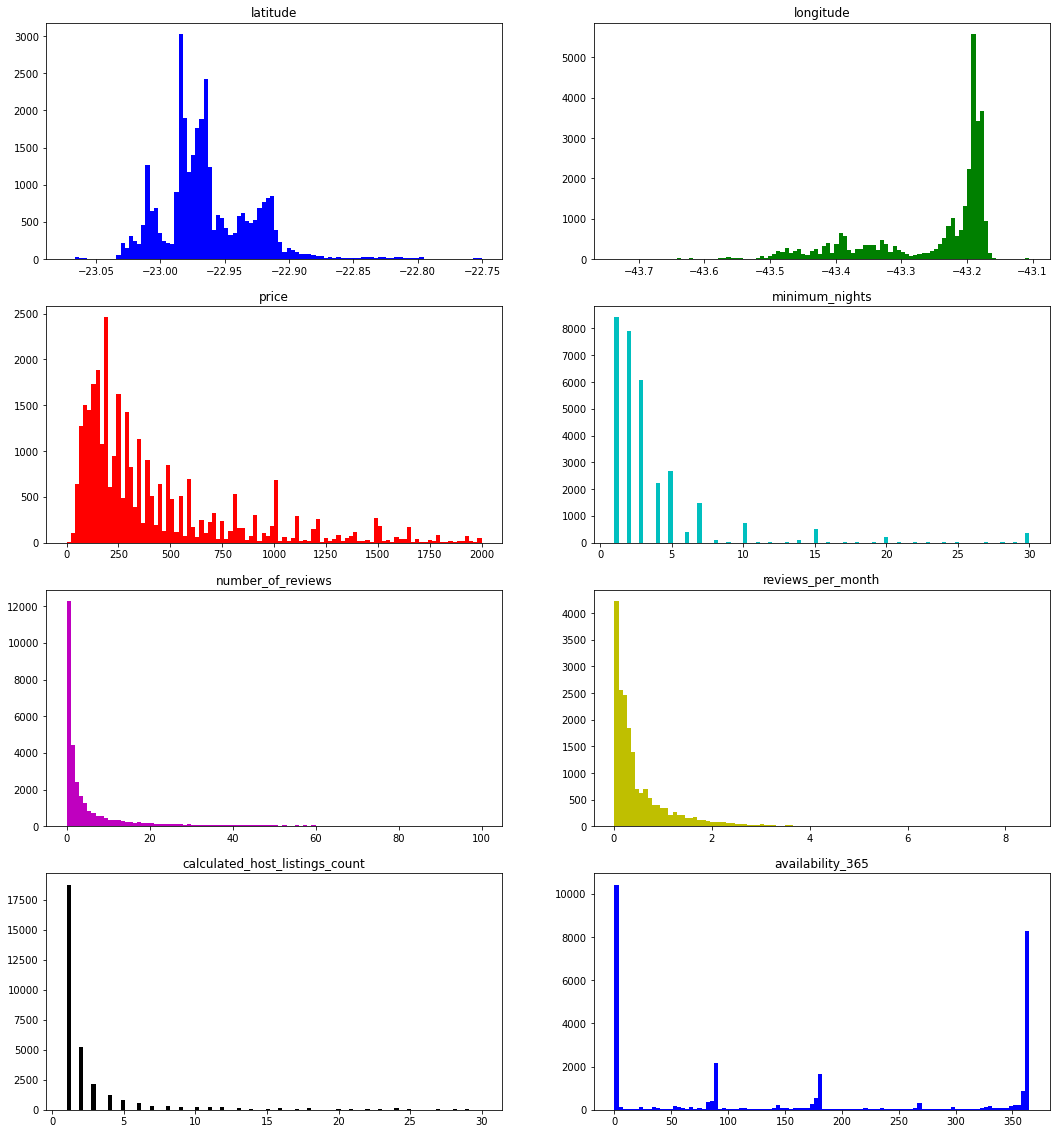

In [23]:
count_number = len(listings._get_numeric_data().columns[1:])
plt.figure(figsize = (18, 20))
cont = 1
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']

for i in listings._get_numeric_data().columns:
      plt.subplot(4, 2, cont)
      plt.hist(listings[i], bins = 100, color=colors[cont-1])
      plt.title(str(i))
      cont+=1

plt.show()

In [24]:
listings._get_numeric_data().describe()[1:]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
mean,-22.963794,-43.253242,416.623642,3.609459,7.602607,0.524899,2.689964,168.019728
std,0.035548,0.098219,387.715722,4.279613,15.851824,0.669539,3.939019,154.543320
min,-23.072970,-43.737090,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,-22.984080,-43.322080,149.000000,1.000000,0.000000,0.110000,1.000000,0.000000
50%,-22.969430,-43.198190,277.000000,2.000000,1.000000,0.280000,1.000000,143.000000
75%,-22.941550,-43.186180,525.000000,4.000000,6.000000,0.660000,2.000000,362.000000
max,-22.750380,-43.104620,2000.000000,30.000000,100.000000,8.490000,30.000000,365.000000


In [25]:
multiplot=0.02
lat1, lat2 = listings['latitude'].min() - multiplot if listings['latitude'].min() < 0 else listings['latitude'].min() + multiplot, listings['latitude'].max() - multiplot if listings['latitude'].max() < 0 else listings['latitude'].max() + multiplot
lon1, lon2 = listings['longitude'].min() - multiplot if listings['longitude'].min() < 0 else listings['longitude'].min() + multiplot, listings['longitude'].max() - multiplot if listings['latitude'].max() < 0 else listings['latitude'].max() + multiplot

lat1, lat2 = round(lat1, 4), round(lat2, 4)
lon1, lon2 = round(lon1, 4), round(lon2, 4)

print(listings['latitude'].min(),listings['latitude'].max())
print(lat1, lat2)
print(listings['longitude'].min(),listings['longitude'].max())
print(lon1, lon2)

-23.07297 -22.75038
-23.093 -22.7704
-43.73709 -43.104620000000004
-43.7571 -43.1246


Color: green type: Entire home/apt
Color: red type: Private room
Color: yellow type: Shared room
Color: blue type: Hotel room


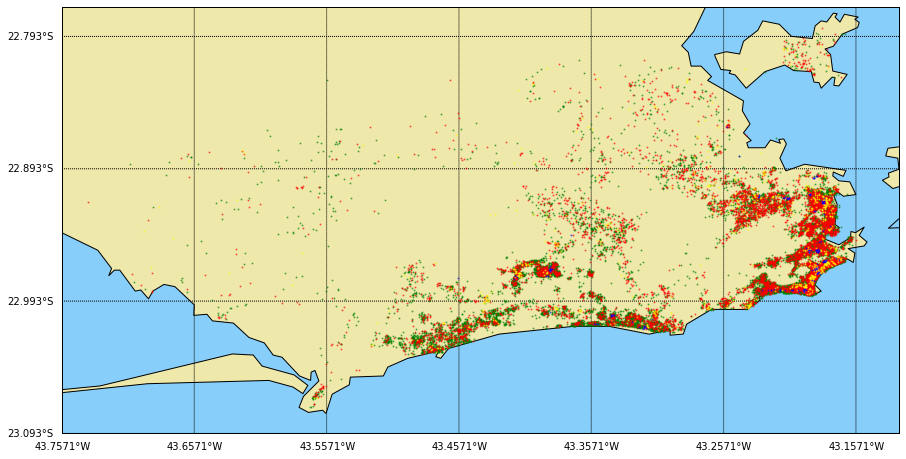

In [26]:
map = Utils.plot_map(lat1, lat2, lon1, lon2)

colors = ['green', 'red', 'yellow', 'blue']
cont = 0

for i in listings['room_type'].unique():
  print('Color: '+colors[cont]+' type: '+str(listings['room_type'].unique()[cont]))
  map.scatter(listings[listings['room_type'] == i]['longitude'],
              listings[listings['room_type'] == i]['latitude'],
              s = 1, c = colors[cont],
              alpha = 0.5, zorder=5)
  cont+=1

In [27]:
listings.head(0)

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,


In [28]:
columns_want = ['neighbourhood', 'room_type', 'price', 'minimum_nights', 
                'number_of_reviews', 'reviews_per_month', 'availability_365',
                'calculated_host_listings_count']
dados = listings[columns_want].copy()

In [29]:
dados.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count
id,,,,,,,,
21280,Ipanema,Entire home/apt,442,5,94,1.23,90,1
48726,Copacabana,Private room,105,3,42,1.35,90,1
48901,Copacabana,Entire home/apt,548,4,4,0.07,348,1
50294,Ipanema,Entire home/apt,1206,3,72,0.67,322,5
60718,Flamengo,Entire home/apt,1084,7,8,0.07,240,2


In [30]:
dados._get_numeric_data().describe()[1:]

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count
mean,416.623642,3.609459,7.602607,0.524899,168.019728,2.689964
std,387.715722,4.279613,15.851824,0.669539,154.543320,3.939019
min,0.000000,1.000000,0.000000,0.010000,0.000000,1.000000
25%,149.000000,1.000000,0.000000,0.110000,0.000000,1.000000
50%,277.000000,2.000000,1.000000,0.280000,143.000000,1.000000
75%,525.000000,4.000000,6.000000,0.660000,362.000000,2.000000
max,2000.000000,30.000000,100.000000,8.490000,365.000000,30.000000


In [31]:
print(dados.isnull().sum())
print('\n\n')
dados['reviews_per_month'].fillna(0, inplace=True)
print(dados.isnull().sum())

neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 12278
availability_365                      0
calculated_host_listings_count        0
dtype: int64



neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
availability_365                  0
calculated_host_listings_count    0
dtype: int64


In [32]:
dados[dados.index == 86978]

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count
id,,,,,,,,
86978,Barra da Tijuca,Private room,825,1,0,0.0,365,1


In [33]:
dados.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count
id,,,,,,,,
21280,Ipanema,Entire home/apt,442,5,94,1.23,90,1
48726,Copacabana,Private room,105,3,42,1.35,90,1
48901,Copacabana,Entire home/apt,548,4,4,0.07,348,1
50294,Ipanema,Entire home/apt,1206,3,72,0.67,322,5
60718,Flamengo,Entire home/apt,1084,7,8,0.07,240,2


In [34]:
dados['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [35]:
dados = pd.concat([dados, pd.get_dummies(dados['room_type'])], axis=1)
dados.drop('room_type', axis=1, inplace=True)
dados.head()

,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count,Entire home/apt,Hotel room,Private room,Shared room
id,,,,,,,,,,,
21280,Ipanema,442,5,94,1.23,90,1,1,0,0,0
48726,Copacabana,105,3,42,1.35,90,1,0,0,1,0
48901,Copacabana,548,4,4,0.07,348,1,1,0,0,0
50294,Ipanema,1206,3,72,0.67,322,5,1,0,0,0
60718,Flamengo,1084,7,8,0.07,240,2,1,0,0,0


In [36]:
vizinhos = pd.DataFrame(dados['neighbourhood'].value_counts())
valores_vizinhos = listings.groupby(['neighbourhood'])['neighbourhood','latitude','longitude'].mean()

neighbourhood = pd.concat([vizinhos, valores_vizinhos], axis = 1)
neighbourhood = neighbourhood.rename(columns={"neighbourhood": "quantidade"})
neighbourhood.to_csv(pasta+'/neighbourhood.csv')
neighbourhood.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,quantidade,latitude,longitude
Copacabana,8043,-22.972407,-43.186346
Barra da Tijuca,3364,-23.004726,-43.354376
Ipanema,2308,-22.984106,-43.201331
Jacarepaguá,1890,-22.968044,-43.392555
Botafogo,1682,-22.951133,-43.184943


<Figure size 1080x1800 with 0 Axes>

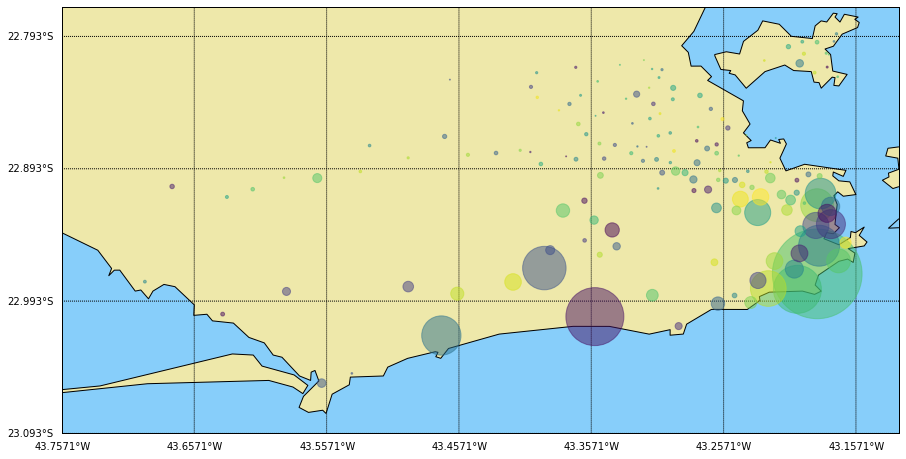

In [37]:
plt.figure(figsize = (15, 25))
map = Utils.plot_map(lat1, lat2, lon1, lon2)
area = neighbourhood['quantidade']
colors = np.random.rand(area.shape[0])
x = neighbourhood['longitude']
y = neighbourhood['latitude']

cont = 0

map.scatter(x, y, s=area, c=colors, alpha=0.5, zorder=5)

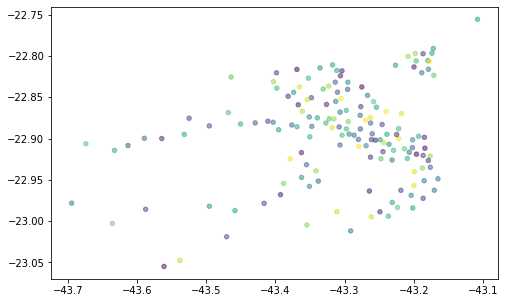

In [38]:
plt.figure(figsize = (8, 5))
area = neighbourhood['quantidade']
colors = np.random.rand(area.shape[0])
x = neighbourhood['longitude']
y = neighbourhood['latitude']

cont = 0

plt.scatter(x, y, 
            s=20,#area, 
            c=colors, 
            alpha=0.5, 
            zorder=5)

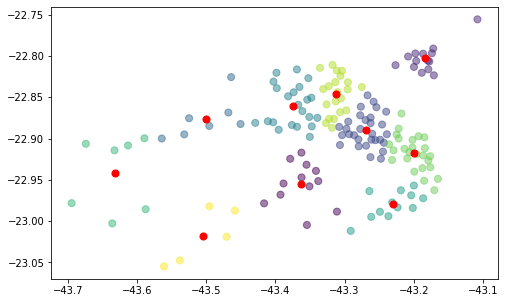

In [39]:
plt.figure(figsize = (8, 5))
kmeans = KMeans(n_clusters=10).fit(neighbourhood[['longitude', 'latitude']])
centroids = kmeans.cluster_centers_

plt.scatter(neighbourhood['longitude'].values, neighbourhood['latitude'].values, c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

<Figure size 1080x1800 with 0 Axes>

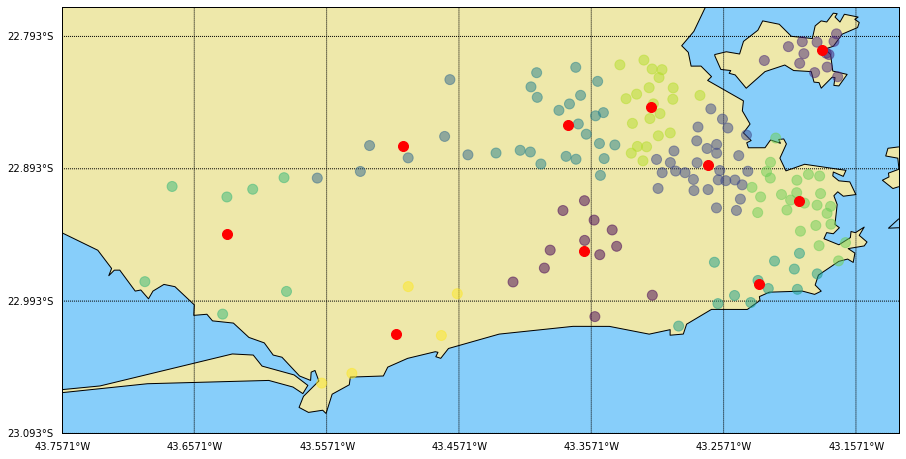

In [40]:
plt.figure(figsize = (15, 25))
map = Utils.plot_map(lat1, lat2, lon1, lon2)
area = 100
colors = np.random.rand(area)
x = neighbourhood['longitude']
y = neighbourhood['latitude']

cont = 0

map.scatter(x, y, s=area, c=kmeans.labels_.astype(float), alpha=0.5, zorder=5)
map.scatter(centroids[:, 0], centroids[:, 1], c='red', s=area, zorder=5)
plt.show()

In [41]:
dados_n = pd.DataFrame(neighbourhood['quantidade'], index=neighbourhood.index)
dados_n['labels'] = kmeans.labels_

In [42]:
dados_n.head()

,quantidade,labels
Copacabana,8043,5
Barra da Tijuca,3364,0
Ipanema,2308,5
Jacarepaguá,1890,0
Botafogo,1682,7


In [43]:
dados['neighbourhood_labels'] = 0

In [44]:
for i in range(0, dados.shape[0]):
  dados['neighbourhood_labels'].iloc[i]  = dados_n['labels'][dados_n.index == dados['neighbourhood'].iloc[i]][0]
dados.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count,Entire home/apt,Hotel room,Private room,Shared room,neighbourhood_labels
id,,,,,,,,,,,,
21280,Ipanema,442,5,94,1.23,90,1,1,0,0,0,5
48726,Copacabana,105,3,42,1.35,90,1,0,0,1,0,5
48901,Copacabana,548,4,4,0.07,348,1,1,0,0,0,5
50294,Ipanema,1206,3,72,0.67,322,5,1,0,0,0,5
60718,Flamengo,1084,7,8,0.07,240,2,1,0,0,0,7


In [45]:
vizinhanca = {i:dados_n[dados_n['labels'] == i].idxmax()[0] for i in range(0, 10)}
vizinhanca = pd.Series(vizinhanca)
vizinhanca = pd.DataFrame(vizinhanca, columns=['vizinhanca'])
vizinhanca

,vizinhanca
0,Barra da Tijuca
1,Jardim Guanabara
2,Vila Isabel
3,Campo Grande
4,Praça Seca
5,Copacabana
6,Guaratiba
7,Botafogo
8,Irajá
9,Recreio dos Bandeirantes


In [46]:
dados.drop('neighbourhood', axis=1, inplace=True)

In [47]:
dados.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count,Entire home/apt,Hotel room,Private room,Shared room,neighbourhood_labels
id,,,,,,,,,,,
21280,442,5,94,1.23,90,1,1,0,0,0,5
48726,105,3,42,1.35,90,1,0,0,1,0,5
48901,548,4,4,0.07,348,1,1,0,0,0,5
50294,1206,3,72,0.67,322,5,1,0,0,0,5
60718,1084,7,8,0.07,240,2,1,0,0,0,7


In [48]:
dados.shape

(31377, 11)

In [49]:
dados.to_csv(pasta+'/dados_final.csv')
vizinhanca.to_csv(pasta+'/vizinhanca.csv')